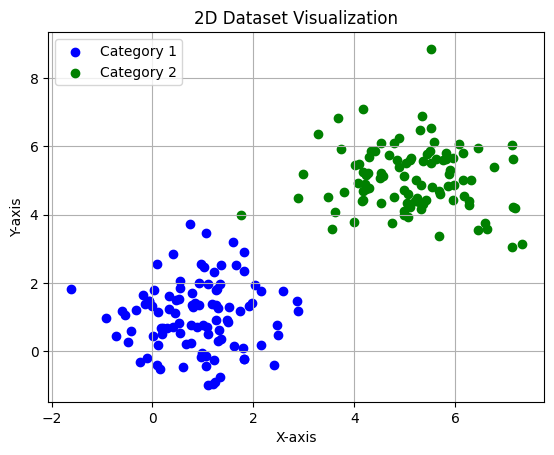

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1a: Generate 2D dataset
np.random.seed(42)  # For reproducibility
mean1 = (1, 1)
mean2 = (5, 5)
std_dev = 1
num_points = 100

# Generate data for category 1
category1_data = np.random.normal(loc=mean1, scale=std_dev, size=(num_points, 2))

# Generate data for category 2
category2_data = np.random.normal(loc=mean2, scale=std_dev, size=(num_points, 2))

# Combine the data into one dataset
combined_data = np.vstack((category1_data, category2_data))

# Assign colors to each category
colors = np.array([0] * num_points + [1] * num_points)  # 0 for category 1, 1 for category 2
plt.grid(True)

# Step 1b: Visualize the data using scatter plots for both categories and legend
plt.scatter(category1_data[:, 0], category1_data[:, 1], c='blue', marker='o', label='Category 1')
plt.scatter(category2_data[:, 0], category2_data[:, 1], c='green', marker='o', label='Category 2')

plt.title('2D Dataset Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


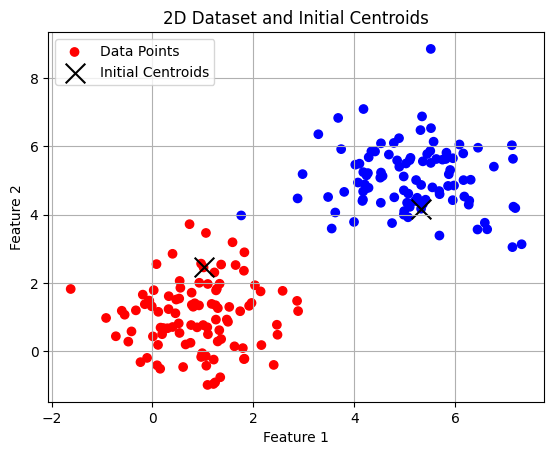

In [7]:
# Step 2 Helper Function

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))


def initialize_centroids(data, k=2):
    centroids_indices = np.random.choice(len(data), k, replace=False)
    centroids = data[centroids_indices]
    return centroids

plt.grid(True)

#Step 2b: Initialize centroids

initial_centroids = initialize_centroids(combined_data, k=2)
colors = ['red'] * 100 + ['blue'] * 100

# Plot the data points and initial centroids
plt.scatter(combined_data[:, 0], combined_data[:, 1], c=colors, marker='o', label='Data Points ')
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='black', marker='x', s=200, label='Initial Centroids')
plt.title('2D Dataset and Initial Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


K-means converged in 4 iterations.
labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
centroid [[0.89309215 1.06314698]
 [5.16228424 5.05427427]]


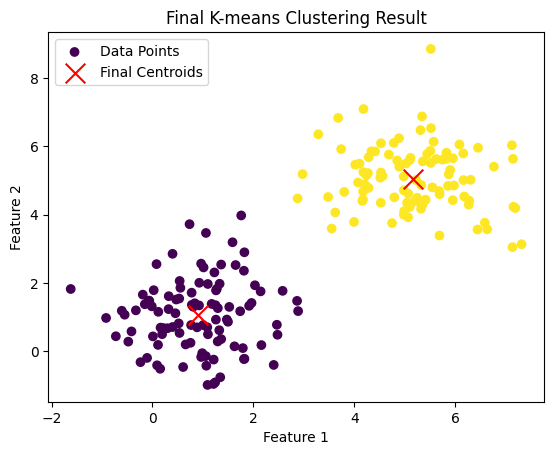

In [8]:
#Step 3 K-means Implementation (25 pts)

def assign_cluster(data, centroids):
    distances = np.array([euclidean_distance(data, centroid) for centroid in centroids])
    return np.argmin(distances)

def update_centroids(data, labels, k):
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kmeans(data, k, max_iter=100):

    centroids = initialize_centroids(data, k)
    
    for iter in range(max_iter):
        
        # Assign each point to the nearest centroid
        labels = np.array([assign_cluster(point, centroids) for point in data])
        
        # Update centroids
        new_centroids = update_centroids(data, labels, k)

        # Check convergence
        if np.all(centroids == new_centroids):
            print(f'K-means converged in {iter+1} iterations.')
            break

        centroids = new_centroids

    return centroids, labels


k_value = 2
kmeans_centroids, kmeans_labels = kmeans(combined_data, k_value)
print("labels",kmeans_labels)
print("centroid",kmeans_centroids)
# Visualize the final K-means clustering result
plt.scatter(combined_data[:, 0], combined_data[:, 1], c=kmeans_labels, cmap='viridis', label='Data Points')
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', marker='x', s=200, label='Final Centroids')
plt.title('Final K-means Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [9]:
import gzip
import struct
import numpy as np

def read_idx(filename):
    with gzip.open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

# File paths for the dataset
train_images_path = 'data/train-images-idx3-ubyte.gz'
train_labels_path = 'data/train-labels-idx1-ubyte.gz'
test_images_path = 'data/t10k-images-idx3-ubyte.gz'
test_labels_path = 'data/t10k-labels-idx1-ubyte.gz'

# Read the dataset files
train_images = read_idx(train_images_path)
train_labels = read_idx(train_labels_path)
test_images = read_idx(test_images_path)
test_labels = read_idx(test_labels_path)

# Reshape and print the shapes of the datasets
print("Training Images Shape:", train_images.shape)
print("Training Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)


Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


In [10]:
from datetime import datetime

# Step 4a: Train a K-means model using the training images of MNIST dataset using K = 10

# Flatten MNIST images
train_images_flat = train_images.reshape(train_images.shape[0], -1)
train_images_flat.shape

# Set the number of clusters (K)
k_value = 10

# Record start time for training
start_time = datetime.now()

# Train the K-means model on the flattened MNIST images using your implementation
kmeans_centroids_mnist, kmeans_labels_mnist = kmeans(train_images_flat, k_value)

# Record end time for training
end_time = datetime.now()

# Calculate and print the time needed for training
training_time = end_time - start_time
print(f"Training time: {training_time}")



K-means converged in 46 iterations.
Training time: 0:04:10.356895


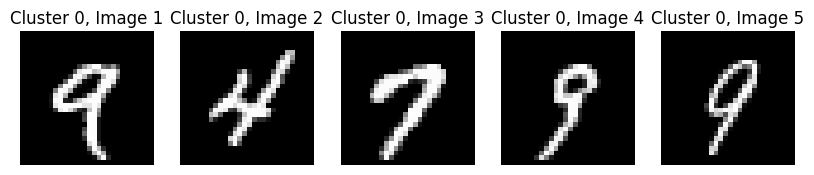

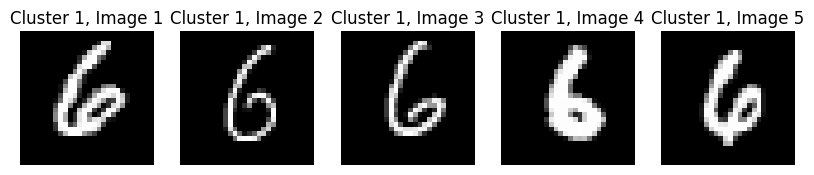

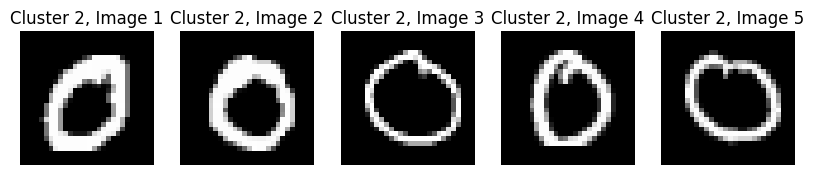

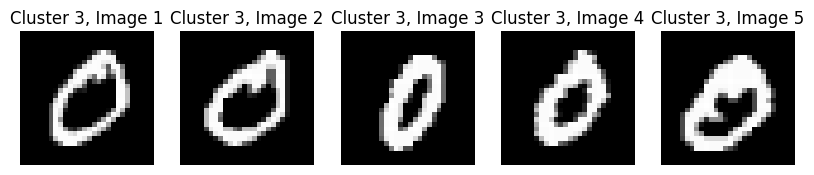

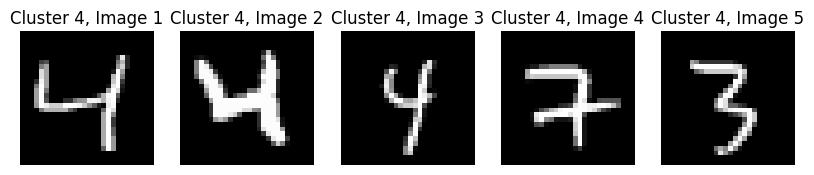

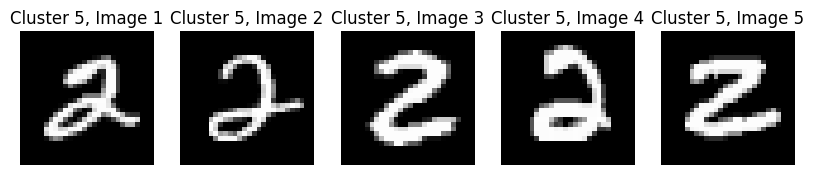

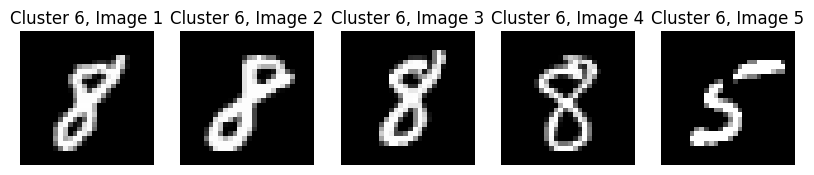

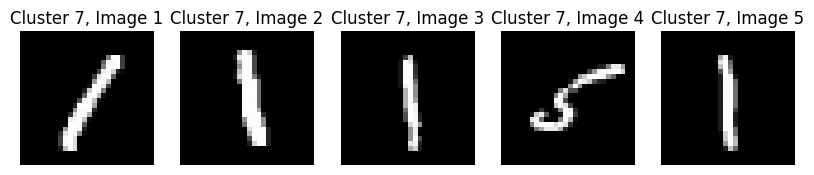

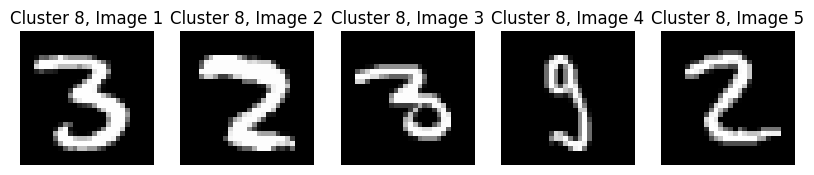

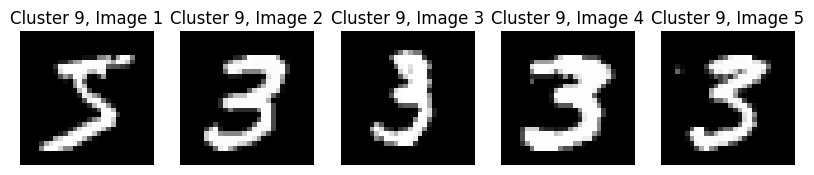

In [11]:
# Visualize the final K-means clustering result for MNIST
num_clusters_mnist = k_value
samples_per_cluster_mnist = 5

for cluster_id in range(num_clusters_mnist):
    cluster_indices_mnist = np.where(kmeans_labels_mnist == cluster_id)[0]
    cluster_samples_mnist = train_images[cluster_indices_mnist[:samples_per_cluster_mnist]]

    plt.figure(figsize=(10, 2))
    for i in range(samples_per_cluster_mnist):
        plt.subplot(1, samples_per_cluster_mnist, i + 1)
        plt.imshow(cluster_samples_mnist[i], cmap='gray')
        plt.axis('off')
        plt.title(f'Cluster {cluster_id}, Image {i + 1}')

    plt.show()


In [12]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Step 5a: Train mini-batch K-means models with different cluster numbers (K)
cluster_numbers = [10, 16, 64, 256]
# Apply the best model to the test dataset
test_images_flat = test_images.reshape(test_images.shape[0], -1)


for k_value in cluster_numbers:
    # Initialize the MiniBatchKMeans model
    print(f"\n Training Mini Btach K mean with K={k_value}")
    mini_batch_kmeans = MiniBatchKMeans(n_clusters=k_value, random_state=42)

    # Train the model on the flattened MNIST images
    mini_batch_kmeans.fit(train_images_flat)

    # Step 5b: Evaluate the model and compare inertia values
    inertia_value = mini_batch_kmeans.inertia_
    print(f"For K={k_value}, Inertia value: {inertia_value}")

    # Apply the best model to the test dataset and print inertia
    test_inertia = mini_batch_kmeans.score(test_images_flat)
    print(f"Inertia on test data for K={k_value}: {test_inertia}")




 Training Mini Btach K mean with K=10


C:\Users\shubh.SHUBHAM_5260\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For K=10, Inertia value: 154368129031.08044
Inertia on test data for K=10: -25654367562.539352

 Training Mini Btach K mean with K=16


C:\Users\shubh.SHUBHAM_5260\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For K=16, Inertia value: 144846426865.57874
Inertia on test data for K=16: -24138424017.945602

 Training Mini Btach K mean with K=64


C:\Users\shubh.SHUBHAM_5260\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For K=64, Inertia value: 117262029090.6891
Inertia on test data for K=64: -19552517660.855843

 Training Mini Btach K mean with K=256


C:\Users\shubh.SHUBHAM_5260\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For K=256, Inertia value: 97806996209.59012
Inertia on test data for K=256: -16474084868.73078


In [13]:
import numpy as np
import gzip
import struct

# Functions for evaluating K-means performance
def assign_labels_to_clusters(clusters, true_labels, k):
    labels = np.zeros_like(clusters)
    for i in range(k):
        mask = (clusters == i)
        # Assign the most common label to the centroid
        labels[mask] = np.bincount(true_labels[mask]).argmax()
    return labels

def manual_accuracy_score(true_labels, predicted_labels):
    correct_predictions = sum(p == t for p, t in zip(predicted_labels, true_labels))
    accuracy = correct_predictions / len(true_labels)
    return accuracy



In [14]:

# Read MNIST data
train_X = read_idx("data/train-images-idx3-ubyte.gz")
train_X_flat = train_X.reshape(train_X.shape[0], -1)
train_y = read_idx("data/train-labels-idx1-ubyte.gz")

# Test data
test_X = read_idx("data/t10k-images-idx3-ubyte.gz")
test_X_flat = test_X.reshape(test_X.shape[0], -1)
test_y = read_idx("data/t10k-labels-idx1-ubyte.gz")


In [15]:

# Train the K-means model on the training data using your implementation
k_value = 10
kmeans_centroids, kmeans_labels = kmeans(train_X_flat, k_value)

# Assign labels to clusters
cluster_labels_train = assign_labels_to_clusters(kmeans_labels, train_y, k_value)

# Calculate accuracy for training data
accuracy_train = manual_accuracy_score(train_y, cluster_labels_train)
print(f"Accuracy based on assigned cluster labels (Training): {accuracy_train}")

# Apply the K-means model to the test data
kmeans_labels_test = kmeans(test_X_flat, k_value)[1]

# Assign labels to clusters for test data
cluster_labels_test = assign_labels_to_clusters(kmeans_labels_test, test_y, k_value)

# Calculate accuracy for test data
accuracy_test = manual_accuracy_score(test_y, cluster_labels_test)
print(f"Accuracy based on assigned cluster labels (Testing): {accuracy_test}")


Accuracy based on assigned cluster labels (Training): 0.6082333333333333
K-means converged in 82 iterations.
Accuracy based on assigned cluster labels (Testing): 0.6046
